<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/Probabilidad_compra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probabilidad de compra**

link github: [notebook_LB](https://github.com/LailaBulh/Programacion---Claas-Files/blob/main/Probabilidad_compra.ipynb)

In [55]:
import pandas as pd
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt


# Encuentre el polinomio de Taylor de orden 3 para la funcion logistica alrededor de x0

In [56]:
df = pd.read_csv('/content/drive/MyDrive/clase_matematicas/compra_producto.csv')
print(df)

x0 = 20

### Variable simbolica
x = sy.symbols('x')

### Funcion logistica
f = 1 / (1 + exp(-(x-x0)))

### Polinomio de Taylor de orden 3

taylor_der1 = sy.diff(f, x, 1)
taylor_der2 = sy.diff(f, x, 2)
taylor_der3 = sy.diff(f, x, 3)

print('\nLa primer derivada para la funcion logistica es:\n',taylor_der1)
print('\nLa segunda derivada para la funcion logistica es:\n',taylor_der2)
print('\nLa tercera derivada para la funcion logistica es:\n',taylor_der3)


taylor_expansion = f + (taylor_der1*(x-x0))+ ((taylor_der2 / 2 ) * (x-x0)**2) + ((taylor_der3 / 6) * (x-x0)**3)


    salario en miles  Probabilidad
0                  6        0.0200
1                  7        0.0000
2                  8        0.0600
3                  9        0.0400
4                 10        0.0400
5                 11        0.0399
6                 12        0.0597
7                 13        0.0391
8                 14        0.0375
9                 15        0.0067
10                16        0.0020
11                17        0.0274
12                18        0.0992
13                19        0.2289
14                20        0.5000
15                21        0.7111
16                22        0.8408
17                23        0.9326
18                24        0.9620
19                25        0.9933
20                26        0.9975
21                27        0.9991
22                28        0.9597
23                29        0.9399
24                30        0.9800

La primer derivada para la funcion logistica es:
 exp(20 - x)/(exp(20 - x) + 1)**2

La se

# Evalue el polinomio obtenido para cada uno de los salarios de la tabla

In [57]:
salario = np.array(df['salario en miles'])
print(salario)

eval_function = sy.lambdify(x, taylor_expansion, 'numpy')

### Evaluar polinomio para cada valor de salario
result = eval_function(salario)
print(result)

### Se agrega resultado a df original
df['Evaluacion_polinomio'] = result
print(df)



[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30]
[-3.09603582e-04 -6.63770036e-04 -1.39465923e-03 -2.86112470e-03
 -5.70288309e-03 -1.09708829e-02 -2.01755479e-02 -3.49508462e-02
 -5.56290825e-02 -7.75356838e-02 -8.48819709e-02 -5.22818631e-02
  1.73385299e-02  1.23645959e-01  5.00000000e-01  8.76354041e-01
  9.82661470e-01  1.05228186e+00  1.08488197e+00  1.07753568e+00
  1.05562908e+00  1.03495085e+00  1.02017555e+00  1.01097088e+00
  1.00570288e+00]
    salario en miles  Probabilidad  Evaluacion_polinomio
0                  6        0.0200             -0.000310
1                  7        0.0000             -0.000664
2                  8        0.0600             -0.001395
3                  9        0.0400             -0.002861
4                 10        0.0400             -0.005703
5                 11        0.0399             -0.010971
6                 12        0.0597             -0.020176
7                 13        0.0391             -0.034951
8

# Encuentre el error de aproximacion calculando el valor absoluto de la difrencia de los valroes aproximados y los reales

In [58]:
### Diferencia entre valores evaluadion y de probabilidad

df['Diferencia']= abs(df['Probabilidad']-df['Evaluacion_polinomio'])

print(df)

    salario en miles  Probabilidad  Evaluacion_polinomio  Diferencia
0                  6        0.0200             -0.000310    0.020310
1                  7        0.0000             -0.000664    0.000664
2                  8        0.0600             -0.001395    0.061395
3                  9        0.0400             -0.002861    0.042861
4                 10        0.0400             -0.005703    0.045703
5                 11        0.0399             -0.010971    0.050871
6                 12        0.0597             -0.020176    0.079876
7                 13        0.0391             -0.034951    0.074051
8                 14        0.0375             -0.055629    0.093129
9                 15        0.0067             -0.077536    0.084236
10                16        0.0020             -0.084882    0.086882
11                17        0.0274             -0.052282    0.079682
12                18        0.0992              0.017339    0.081861
13                19        0.2289

# Grafique los valores aproximados y los reales y analice el resultado

Text(0, 0.5, 'Probabilidad de compra')

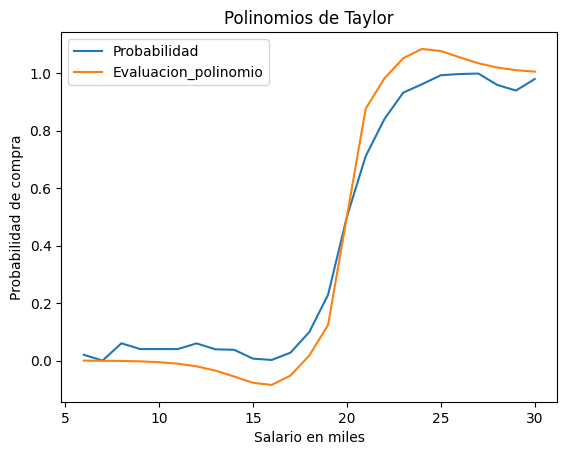

In [60]:
df.plot(kind='line', x= 'salario en miles', y= ['Probabilidad','Evaluacion_polinomio'])

plt.title('Polinomios de Taylor')
plt.xlabel('Salario en miles')
plt.ylabel('Probabilidad de compra')